In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

C:\Users\Crask0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pydens import Solver, D, V, ConvBlockModel
from pydens import NumpySampler as NS

In [3]:
def plot_loss(loss):
    plt.plot(loss)
    plt.grid()
    plt.xlabel('ITERATION', fontsize=16)
    plt.ylabel('L1-loss', fontsize=16)

In [4]:
def plot_approximation_1d(points, approximation, solution_function, savepath=None,
                          title=None, ylim=None):
    if isinstance(points, torch.Tensor):
        points = points.detach().numpy()
    if isinstance(approximation, torch.Tensor):
        approximation = approximation.detach().numpy()

    plt.plot(points, approximation, label='Neural Network approximation',
             linewidth=5, alpha=0.8)
    plt.plot(points, solution_function(points), label='Known analytical solution',
             linewidth=2)
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$\hat{f}(x)$', fontsize=16)
    plt.grid()
    plt.legend(fontsize=12, loc=1)

    if ylim is not None:
        plt.ylim(ylim)

    if title is not None:
      plt.title(title, fontsize=16)

    if savepath is not None:
        plt.savefig(savepath, dpi=300)

In [5]:
def plot_approximation_2d(approximation):
    plt.imshow(approximation)
    plt.colorbar()
    plt.title(r'$\hat{f}(x, y)$', fontsize=16)
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$y$', fontsize=16)

In [6]:
def cart_prod(*arrs):
    """ Get array of cartesian tuples from arbitrary number of arrays.
    """
    grids = np.meshgrid(*arrs, indexing='ij')
    return np.stack(grids, axis=-1).reshape(-1, len(arrs))

## Simple ODE
$$ \frac{d f}{d x} = 2 \pi \cos{[2 \pi x]}, \quad f(0)=0.5. $$

In [7]:
def ode(f, x):
    return D(f, x) - 2 * np.pi * torch.cos(2 * np.pi * x)

100%|██████████| 500/500 [00:01<00:00, 384.81it/s]


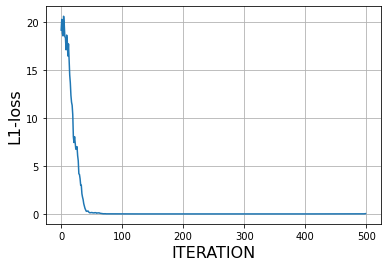

In [8]:
solver = Solver(ode, ndims=1, initial_condition=.5, activation='Tanh')
solver.fit(niters=500, batch_size=400, lr=0.02)
plot_loss(solver.losses)

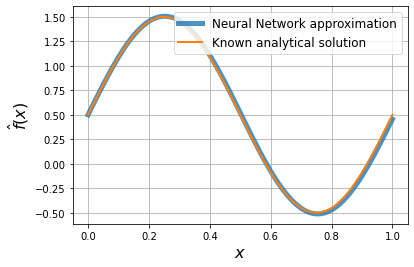

In [9]:
xs = torch.tensor(np.linspace(0, 1, 100)).float()
fs = solver.predict(xs)
plot_approximation_1d(xs, fs, lambda x: np.sin(2 * np.pi * x) + .5)

## Simple ODE System
$$ \begin{cases} \frac{d f}{d x} = 2 \pi \cos{[2 \pi x]} \\ \frac{d g}{d x} = 2 \pi \sin{[2 \pi x]} \end{cases}, \quad f(0)=0.5. $$

In [10]:
def system_ode(f, g, x):
    return [
        D(f, x) - 2 * np.pi * torch.cos(2 * np.pi * x), 
        D(g, x) - 2 * np.pi * torch.sin(2 * np.pi * x)
    ]

In [11]:
solver = Solver(system_ode, ndims=2, initial_condition=.5, activation='Tanh')
# solver.fit(niters=500, batch_size=400, lr=0.02)
# plot_loss(solver.losses)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [ ]:
# xs = torch.tensor(np.linspace(0, 1, 100)).float()
# fs = solver.predict(xs)
# plot_approximation_2d(xs, fs, lambda x: np.sin(2 * np.pi * x) + .5)